**Installing the Libraries**

In [115]:
# for basic mathematical operations
import numpy as np
# for dataframe manipulation
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
# for data analysis
import dabl
from sklearn.preprocessing import LabelEncoder

# For removing warnings
import warnings

**Reading the Dataset**

In [116]:
# importing the dataset

# Load the dataset from the specified CSV file into a pandas DataFrame
data = pd.read_csv("Mall_Customers_Enhanced.csv")

**Examing Data**

In [117]:
#Lets check the shape of the dataset

# Display the number of rows and columns in the dataset
print("Shape of dataset :", data.shape)

Shape of dataset : (200, 10)


In [118]:
#Lets check head of data

# Display the first 5 rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


In [119]:
# Lets check the tail of the data of set

# Display the last 5 rows of the dataset
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
195,196,Female,35,120,79,26-35,56.80,850,7,Luxury
196,197,Female,45,126,28,36-50,102.48,850,5,Electronics
197,198,Male,32,126,74,26-35,63.84,850,6,Luxury
198,199,Male,32,137,18,26-35,120.56,850,4,Fashion
199,200,Male,30,137,83,26-35,61.19,850,7,Luxury


In [120]:
#Lets check sample of data

# Display a random sample of 3 rows from the dataset
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
46,47,Female,50,40,55,36-50,25.33,581,7,Electronics
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
43,44,Female,31,39,61,26-35,23.14,598,6,Budget


**Data Visualization**

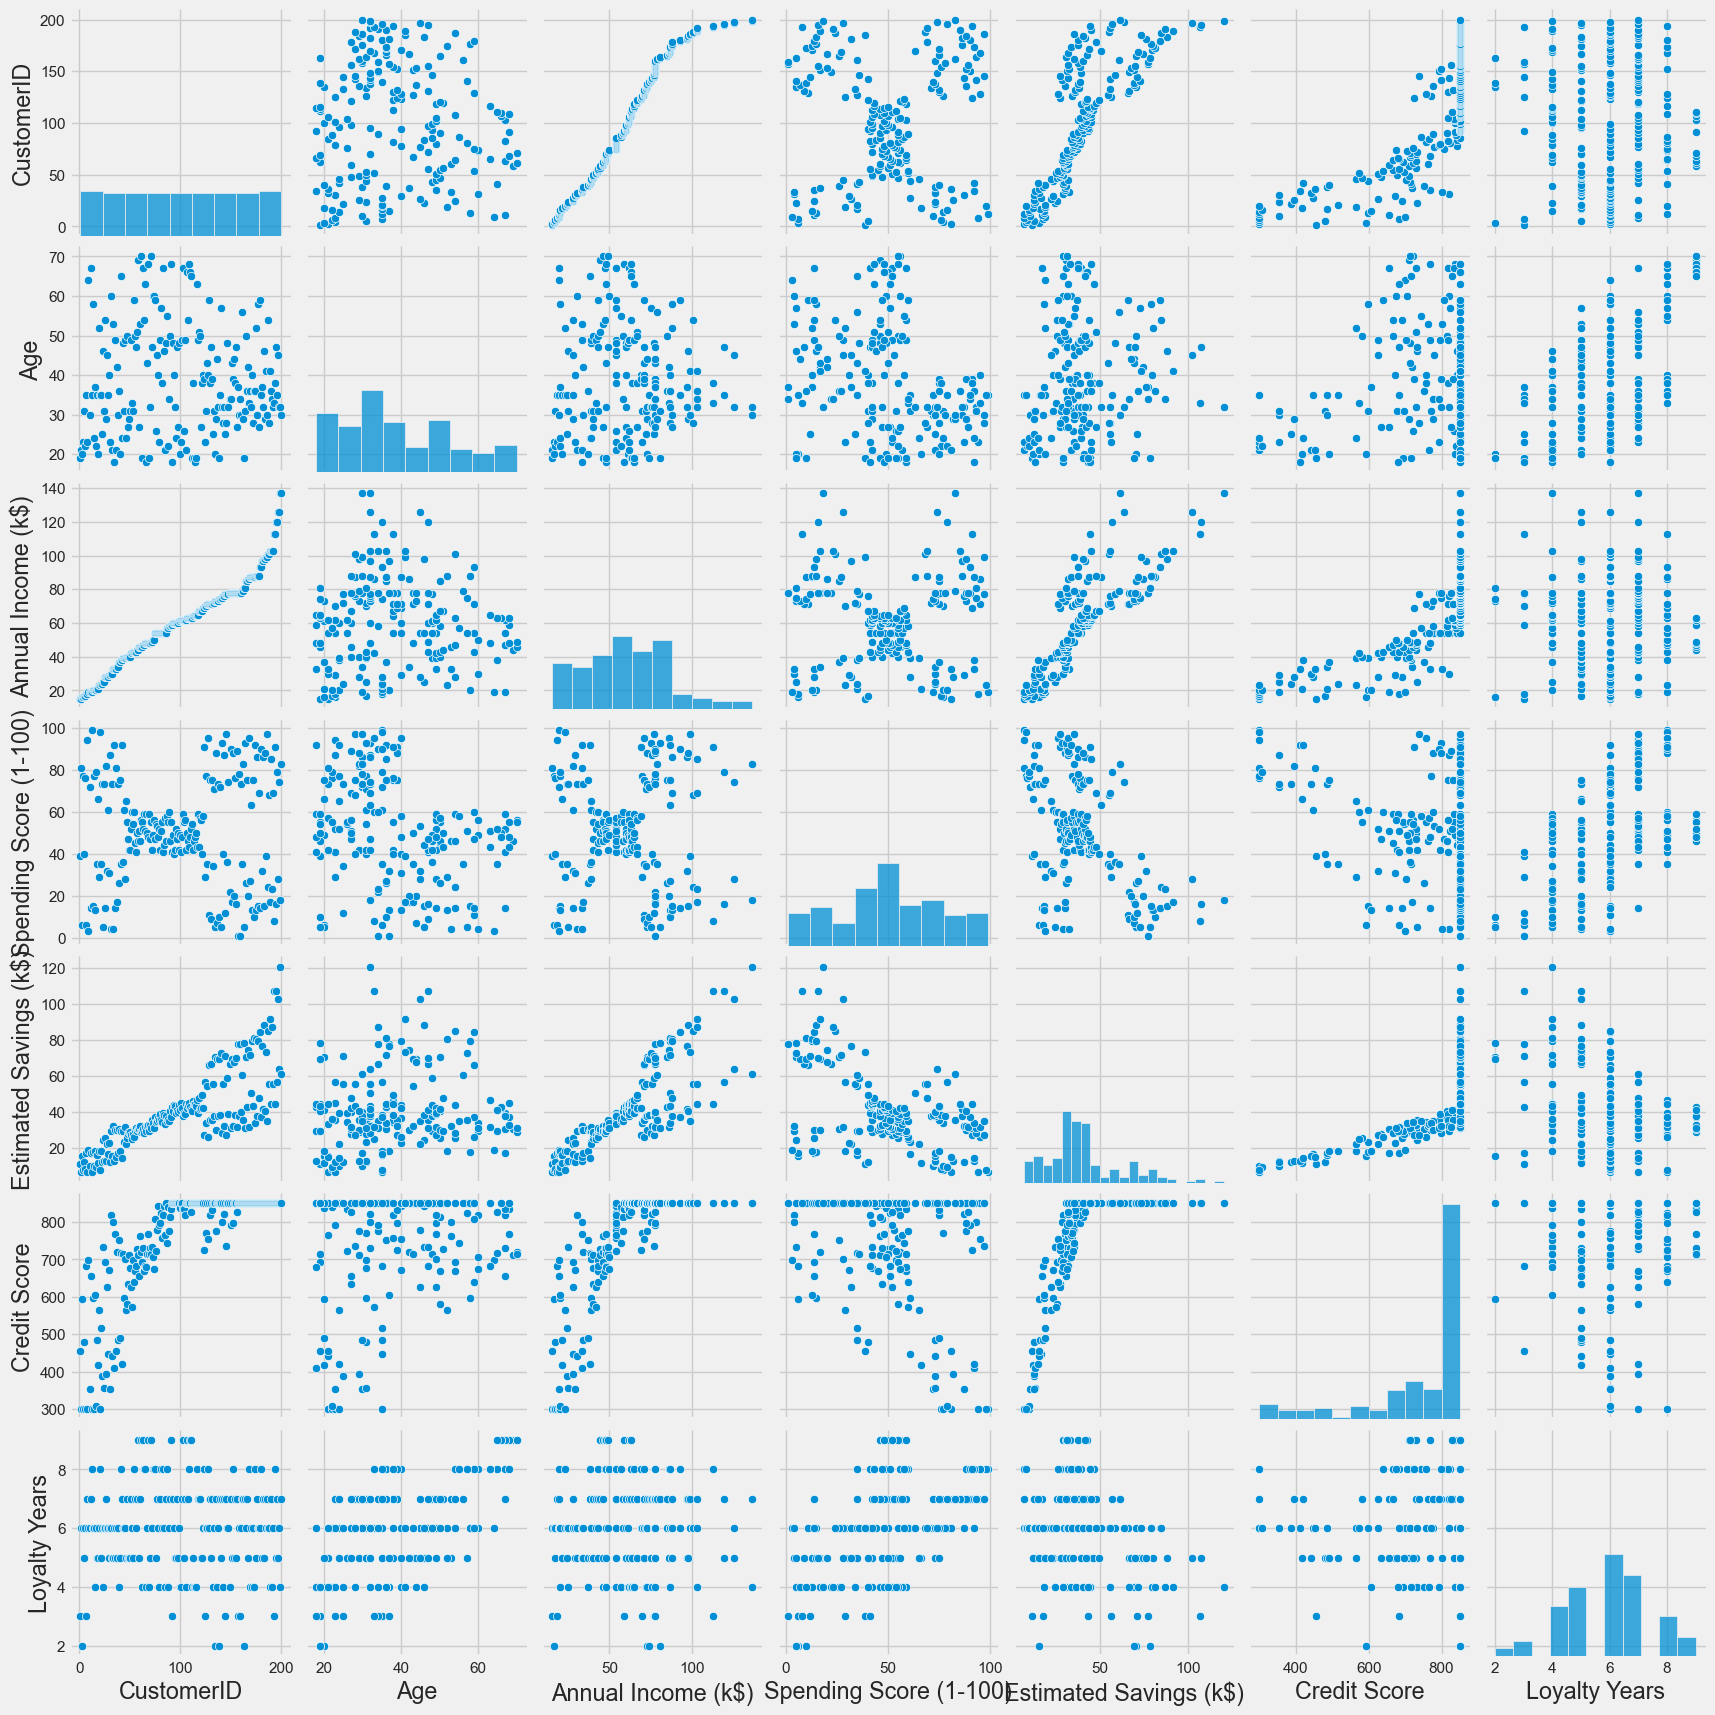

In [121]:
# Lets get the pairplot of the data

# Create a matrix of scatter plots to visualize pairwise relationships between numerical columns
sns.pairplot(data)

# Display the generated plot
plt.show()

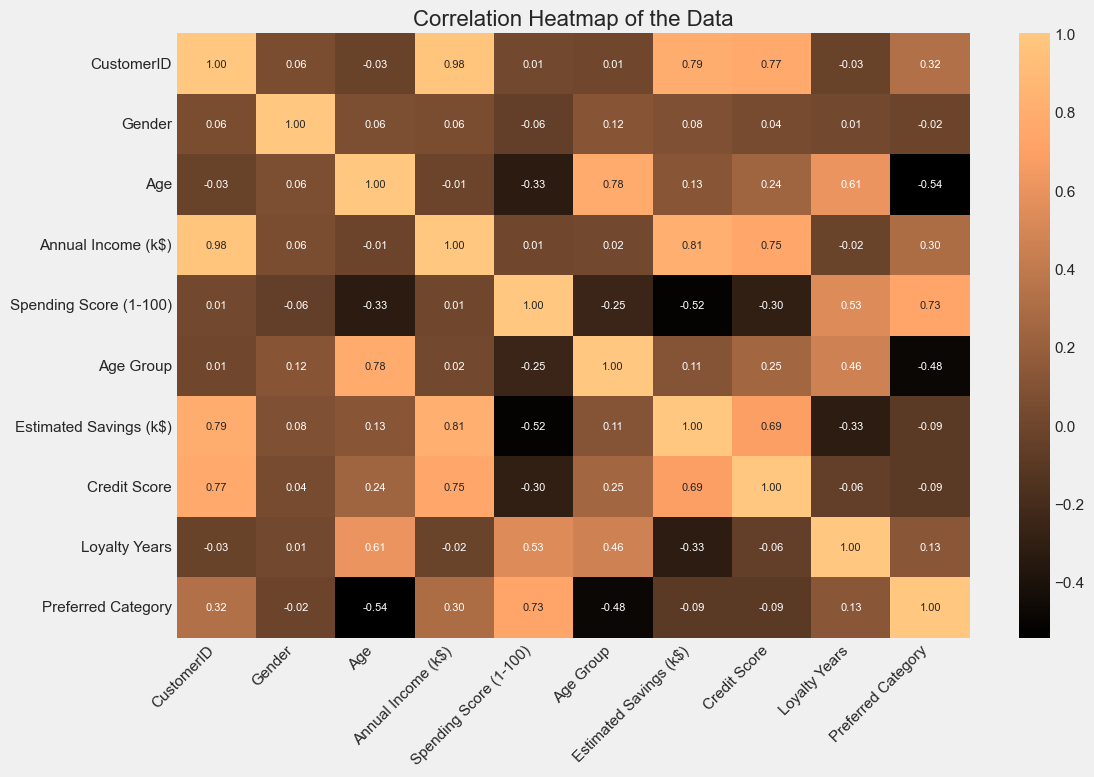

In [122]:
# Copy data
data_numeric = data.copy()

# Encode categorical columns
categorical_columns = data_numeric.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    data_numeric[column] = le.fit_transform(data_numeric[column])

# Create correlation matrix
corr_matrix = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12,8))  # Increase figure size
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="copper",
    fmt=".2f",       # Limit numbers to 2 decimals
    annot_kws={"size":8}  # Smaller font size for annotations
)

plt.title("Correlation Heatmap of the Data", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x labels
plt.yticks(rotation=0)               # Keep y labels horizontal
plt.tight_layout()                   # Adjust layout to prevent cutoff
plt.show()


Target looks like regression


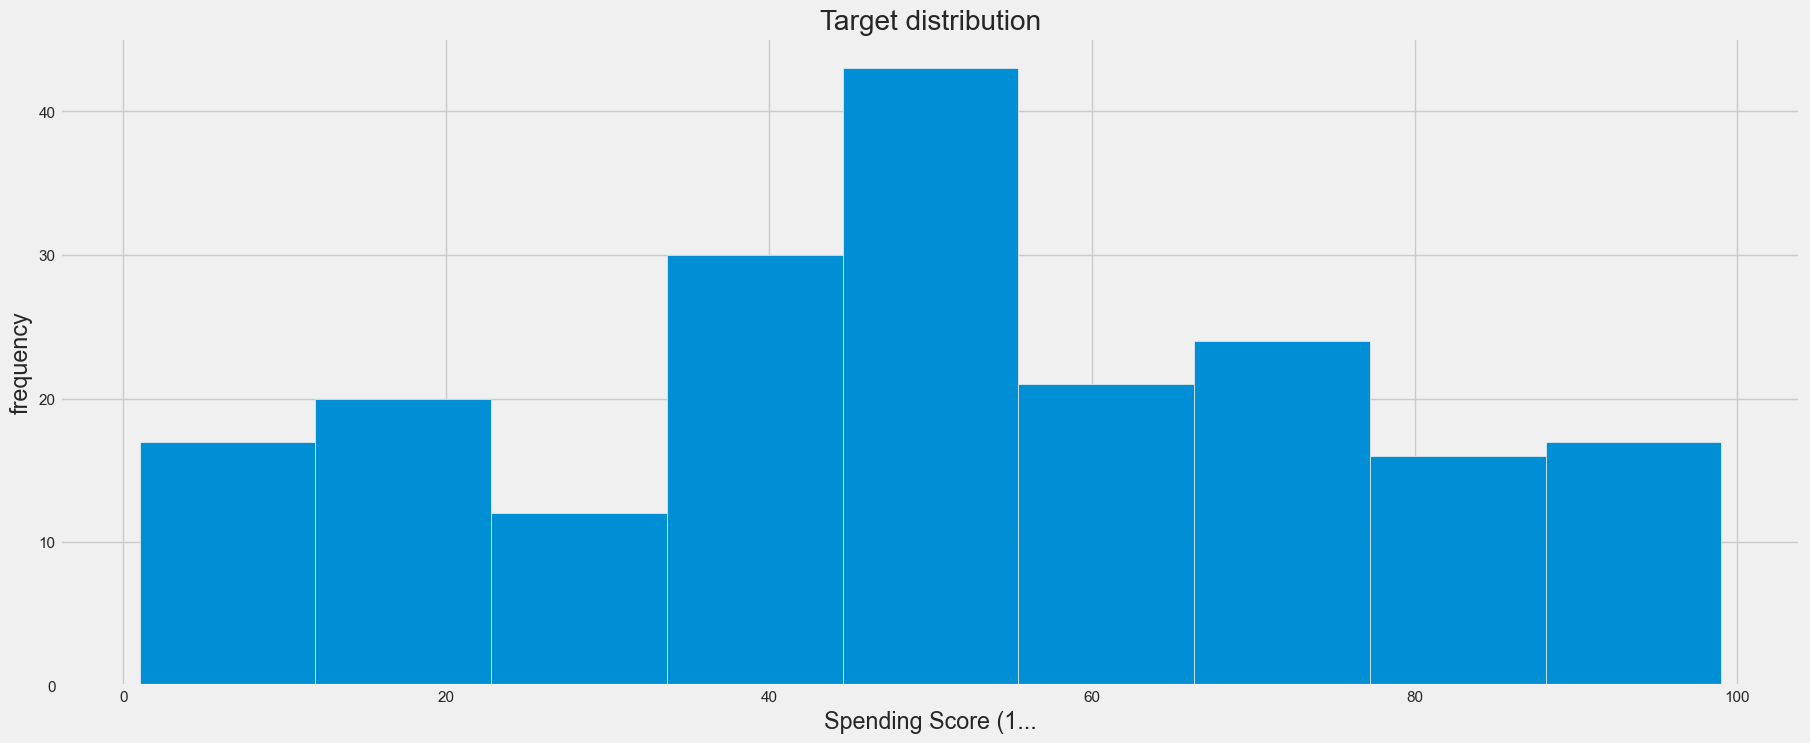

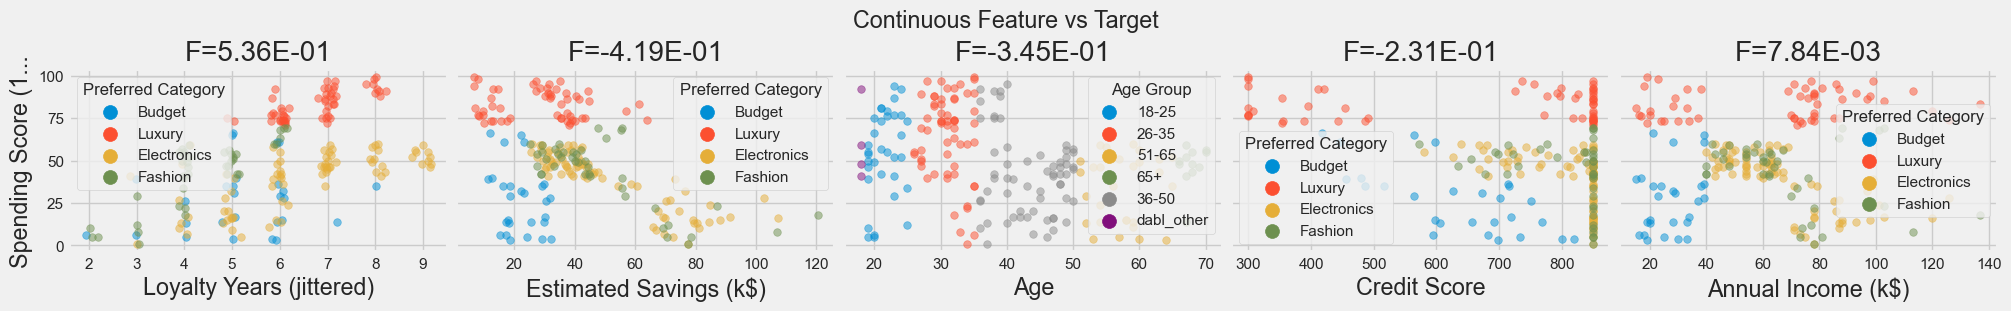

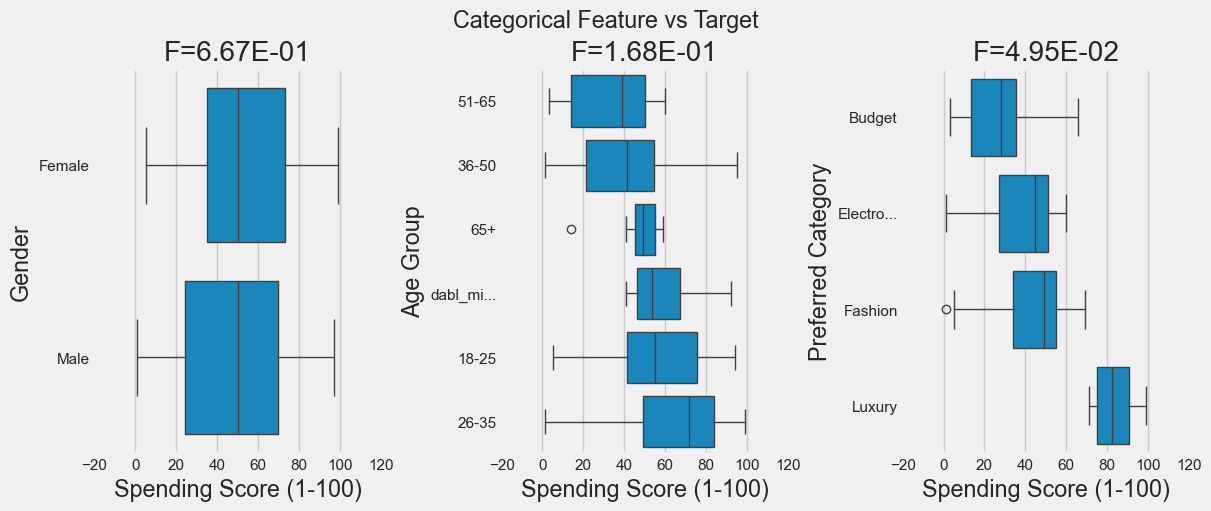

In [123]:
# Lets analyze the data with respect of spending score

# Hide the harmless FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Analyze the data with "Spending Score" as the target variable
dabl.plot(data, target_col = "Spending Score (1-100)")

# Reset warnings back to their default setting
warnings.resetwarnings()

Target looks like regression


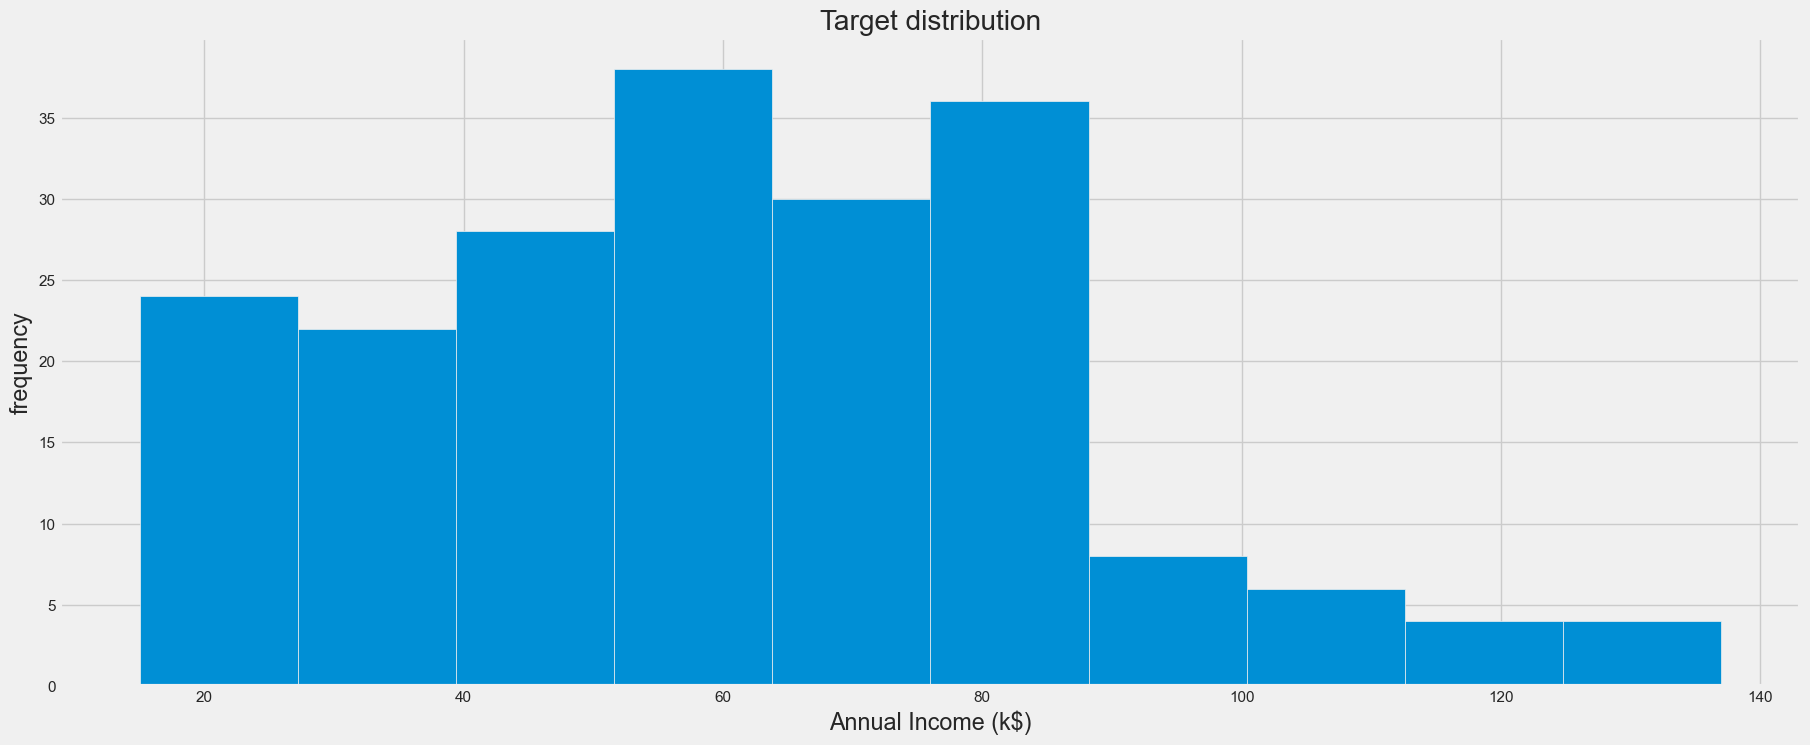

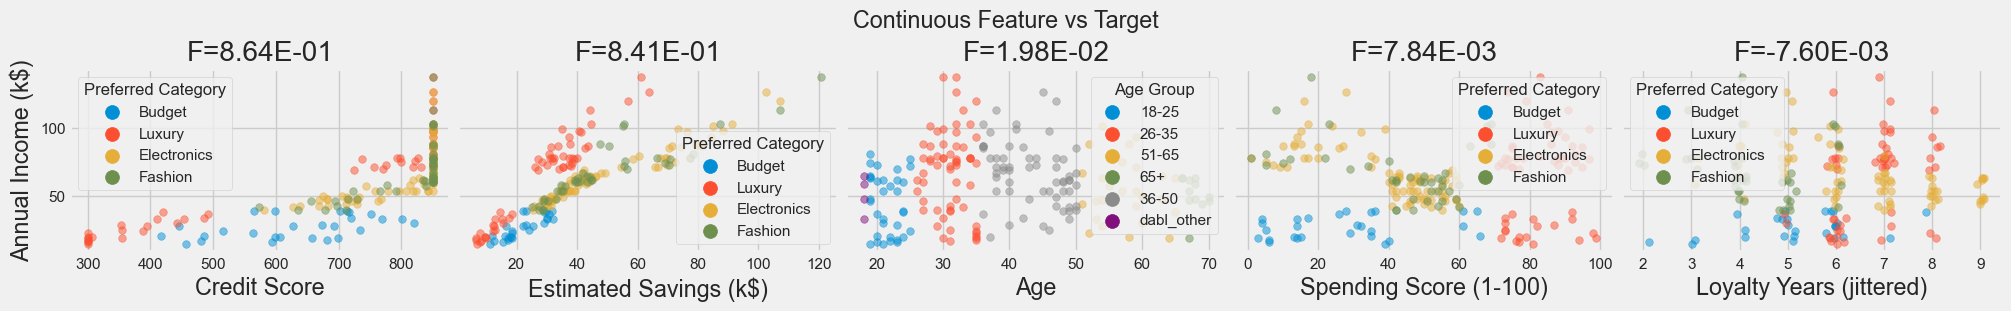

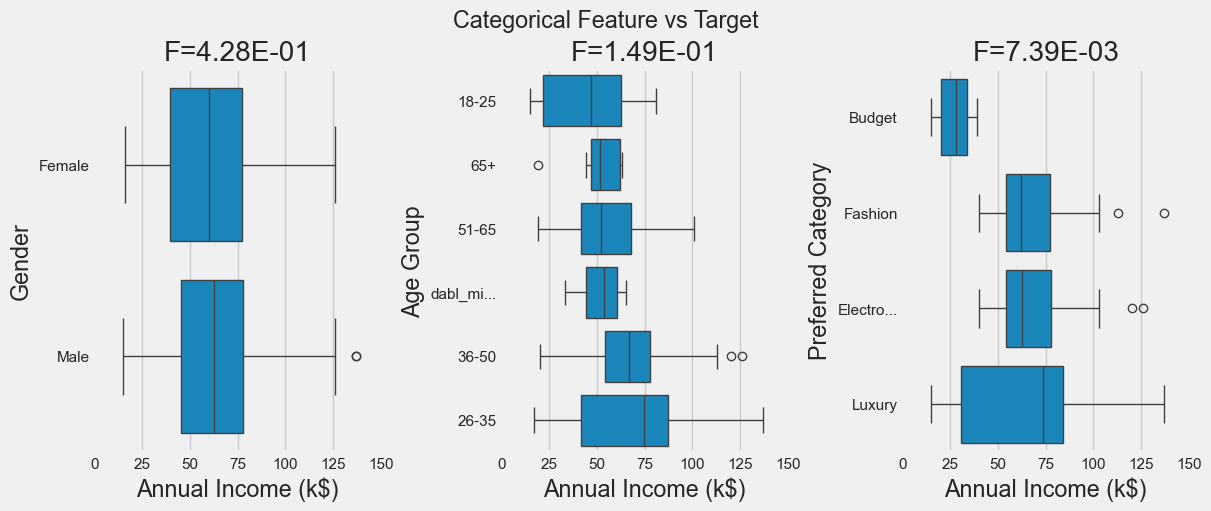

In [124]:
# Lets analyze the data with respect to annual income

# Hide all common library warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)

# Analyze the data with Annual Income as the target
dabl.plot(data, target_col = "Annual Income (k$)")

# Reset warnings to default
warnings.resetwarnings()

Target looks like regression


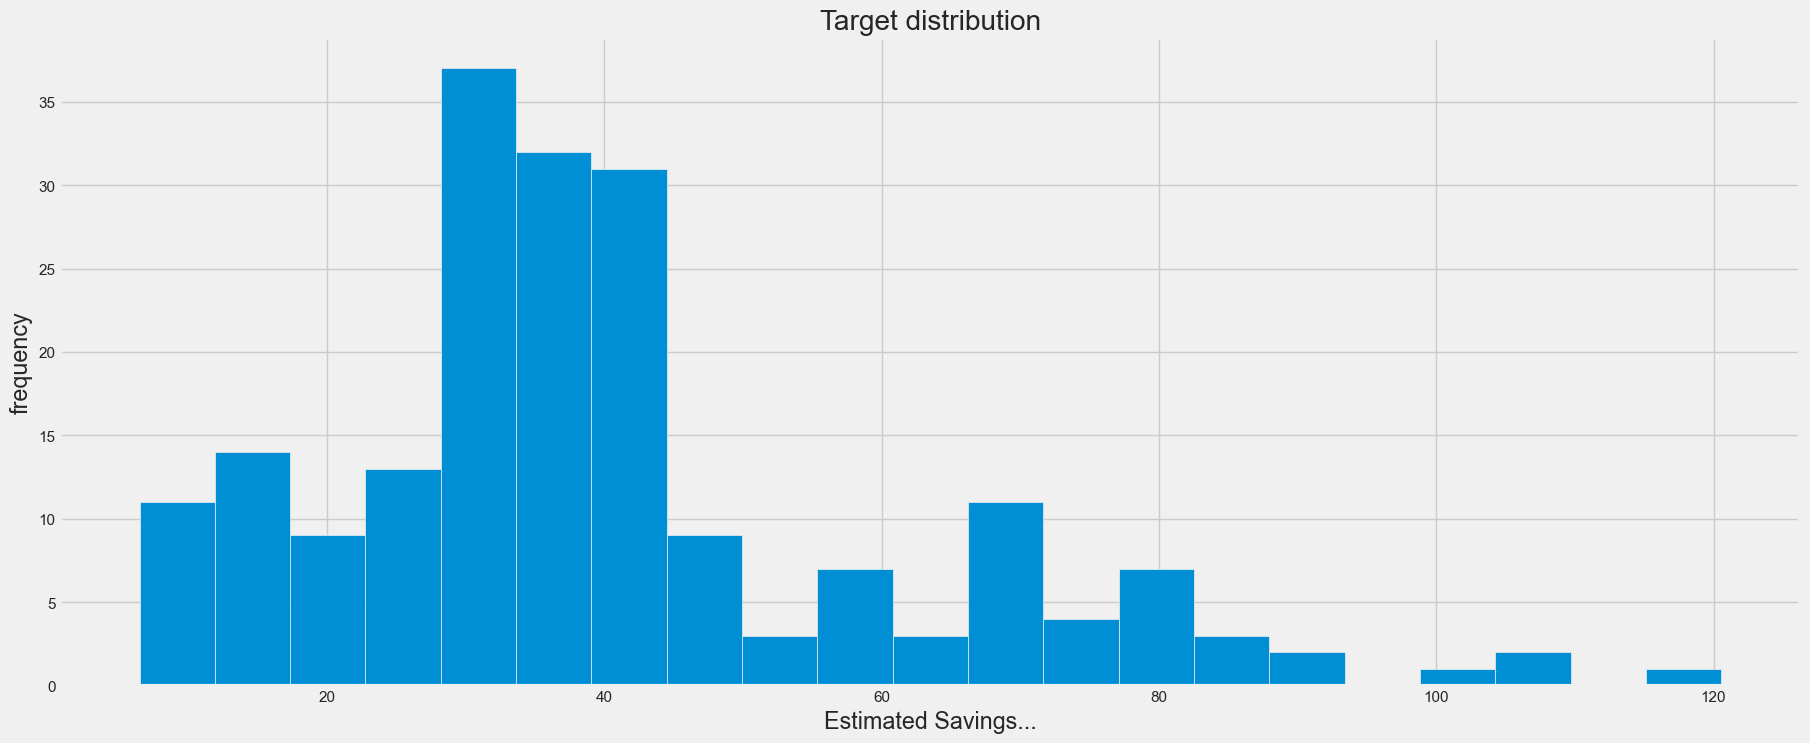

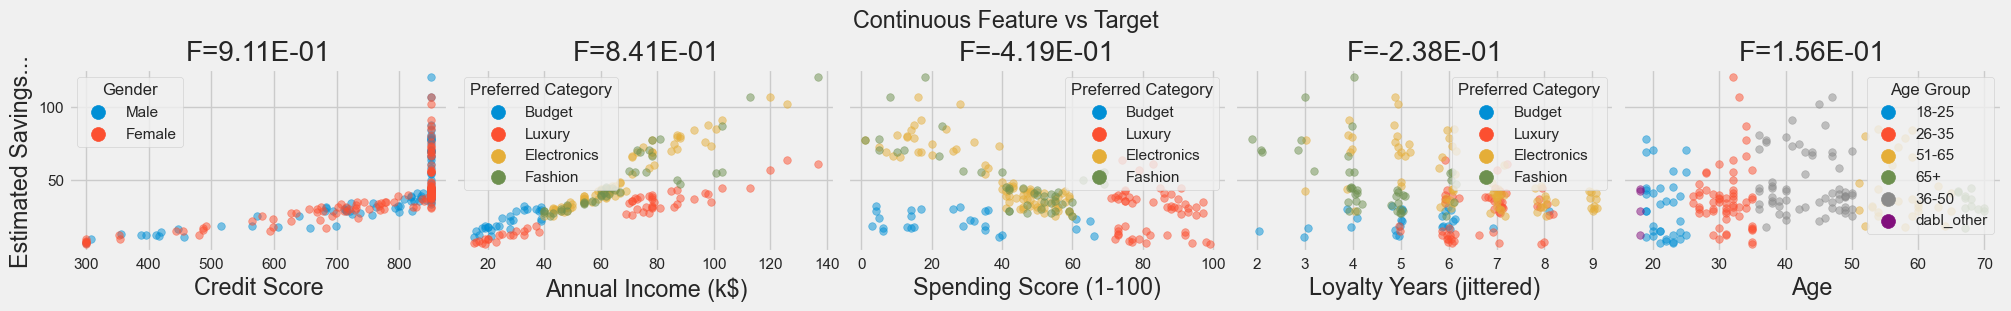

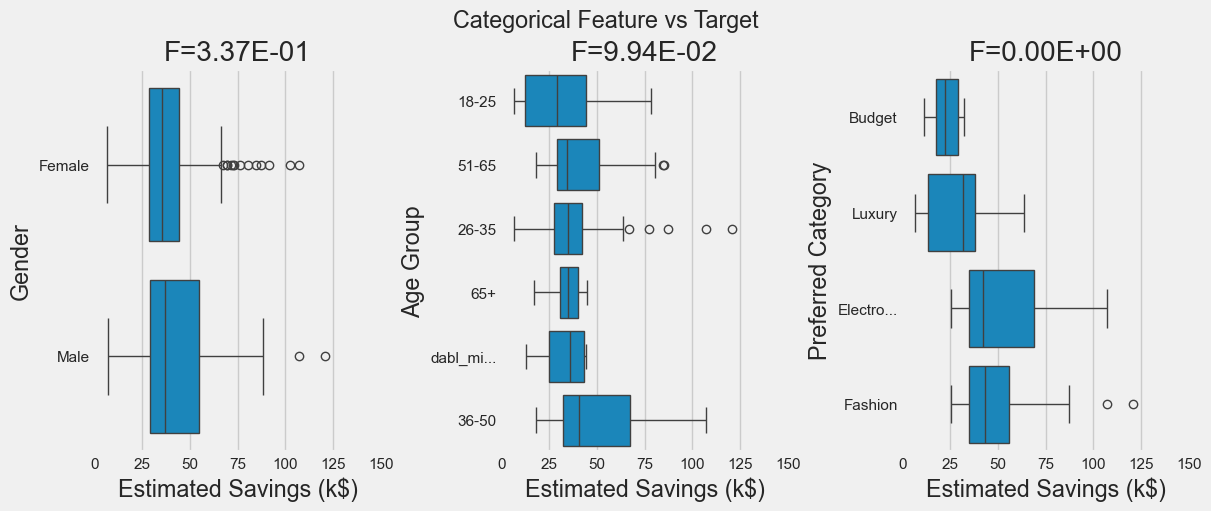

In [125]:
# Lets analyze the data with respect of Estimated Saving

# Hide ALL categories of warnings that have appeared
warnings.filterwarnings('ignore', category=UserWarning) # Hides the date format warning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)

# Analyze the data with Estimated Savings as the target
dabl.plot(data, target_col = "Estimated Savings (k$)")

# Reset warnings to default
warnings.resetwarnings()

***Descriptive statistics***

In [126]:
# describe the data

# Generate descriptive statistics for the numerical columns
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,40.247950,743.680000,5.930000
std,57.879185,13.969007,26.264721,25.823522,21.333448,155.176727,1.570808
min,1.000000,18.000000,15.000000,1.000000,6.460000,300.000000,2.000000
25%,50.750000,28.750000,41.500000,34.750000,28.800000,697.000000,5.000000
50%,100.500000,36.000000,61.500000,50.000000,36.410000,833.000000,6.000000
75%,150.250000,49.000000,78.000000,73.000000,44.967500,850.000000,7.000000
max,200.000000,70.000000,137.000000,99.000000,120.560000,850.000000,9.000000


In [127]:
#describe categorical data

# Generate descriptive statistics for the categorical (object-type) columns
data.describe(include = 'object')

,Gender,Age Group,Preferred Category
count,200,196,200
unique,2,5,4
top,Female,36-50,Electronics
freq,112,62,78


In [128]:
#checking if there is any null value
data.isnull().any().any()

np.True_

**Data Visualization**

Text(0, 0.5, 'Count')

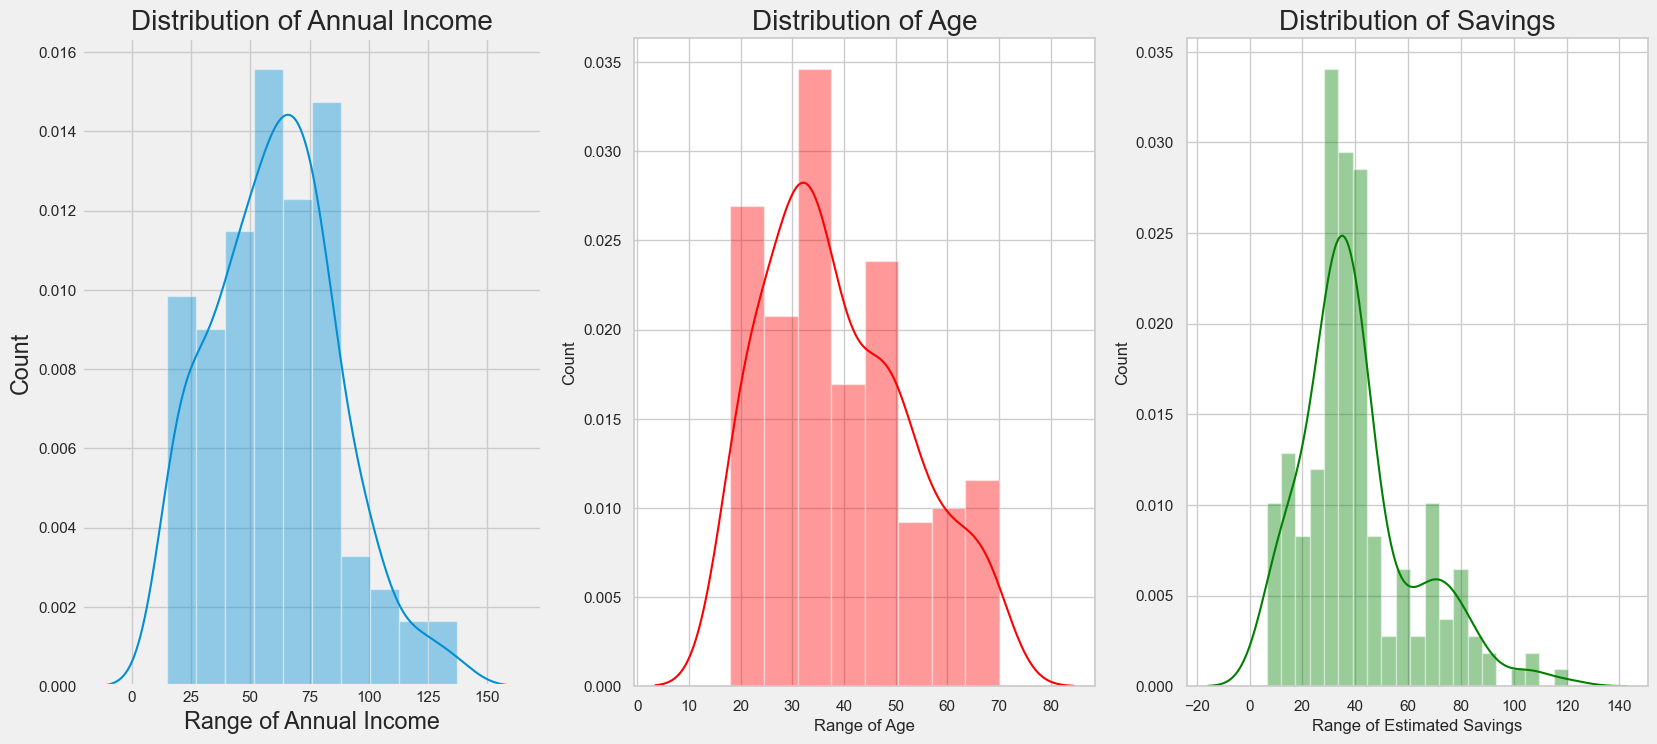

In [129]:
# Ignore any warnings that may appear
warnings.filterwarnings("ignore")

# Set the default size for the plots
plt.rcParams['figure.figsize'] = (18, 8)

# --- First Subplot: Annual Income ---
# Create the first subplot in a 1x3 grid
plt.subplot(1, 3, 1)
# Set the visual style of the plot
sns.set(style = 'whitegrid')
# Plot the distribution of the 'Annual Income' column
sns.distplot(data['Annual Income (k$)'])
# Set the title, x-label, and y-label for the subplot
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

# --- Second Subplot: Age ---
# Create the second subplot in a 1x3 grid
plt.subplot(1, 3, 2)
# Set the visual style of the plot
sns.set(style = 'whitegrid')
# Plot the distribution of the 'Age' column in red
sns.distplot(data['Age'], color =  'red')
# Set the title, x-label, and y-label for the subplot
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

# --- Third Subplot: Estimated Savings ---
# Create the third subplot in a 1x3 grid
plt.subplot(1, 3, 3)
# Set the visual style of the plot
sns.set(style = 'whitegrid')
# Plot the distribution of the 'Estimated Savings' column in green
sns.distplot(data['Estimated Savings (k$)'], color = 'green')
# Set the title, x-label, and y-label for the subplot
plt.title('Distribution of Savings', fontsize = 20)
plt.xlabel('Range of Estimated Savings')
plt.ylabel('Count')

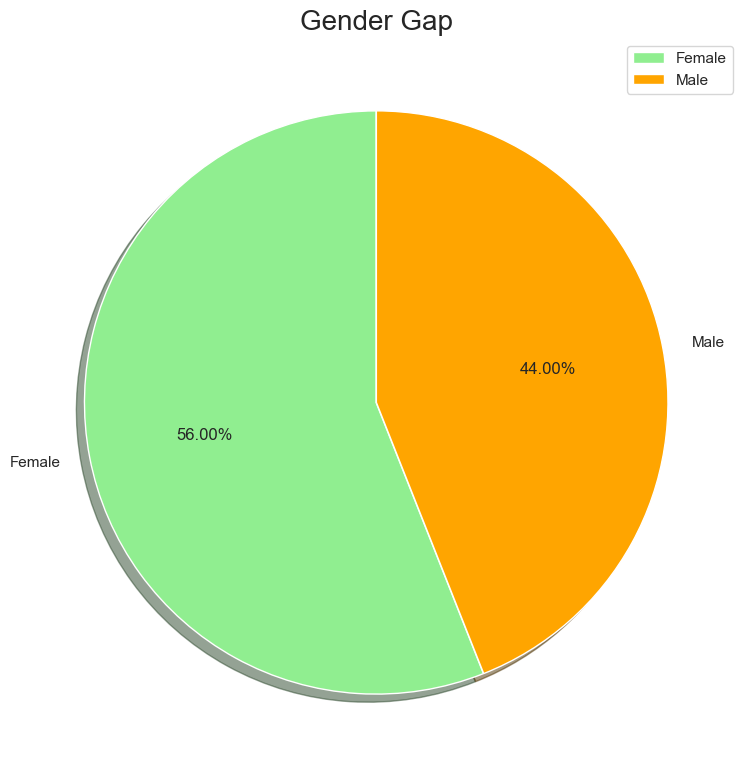

In [130]:
# Gender Gap

# --- Data Preparation ---
# Define the labels for the pie chart slices
labels = ['Female', 'Male']
# Calculate the count of each gender to determine slice sizes
size = data['Gender'].value_counts()
# Define the colors for each slice
colors = ['lightgreen', 'orange']
# Define an 'explode' value to slightly separate the second slice
explode = [0, 0.001]

# --- Plotting ---
# Set the size of the figure
plt.rcParams['figure.figsize'] = (9, 9)
# Create the pie chart with specified parameters
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow =  True, startangle = 90, autopct = '%.2f%%')
# Set the title of the chart
plt.title('Gender Gap', fontsize = 20)
# Turn off the axis lines and labels
plt.axis('off')
# Display the legend for the chart
plt.legend()
# Show the final plot
plt.show()

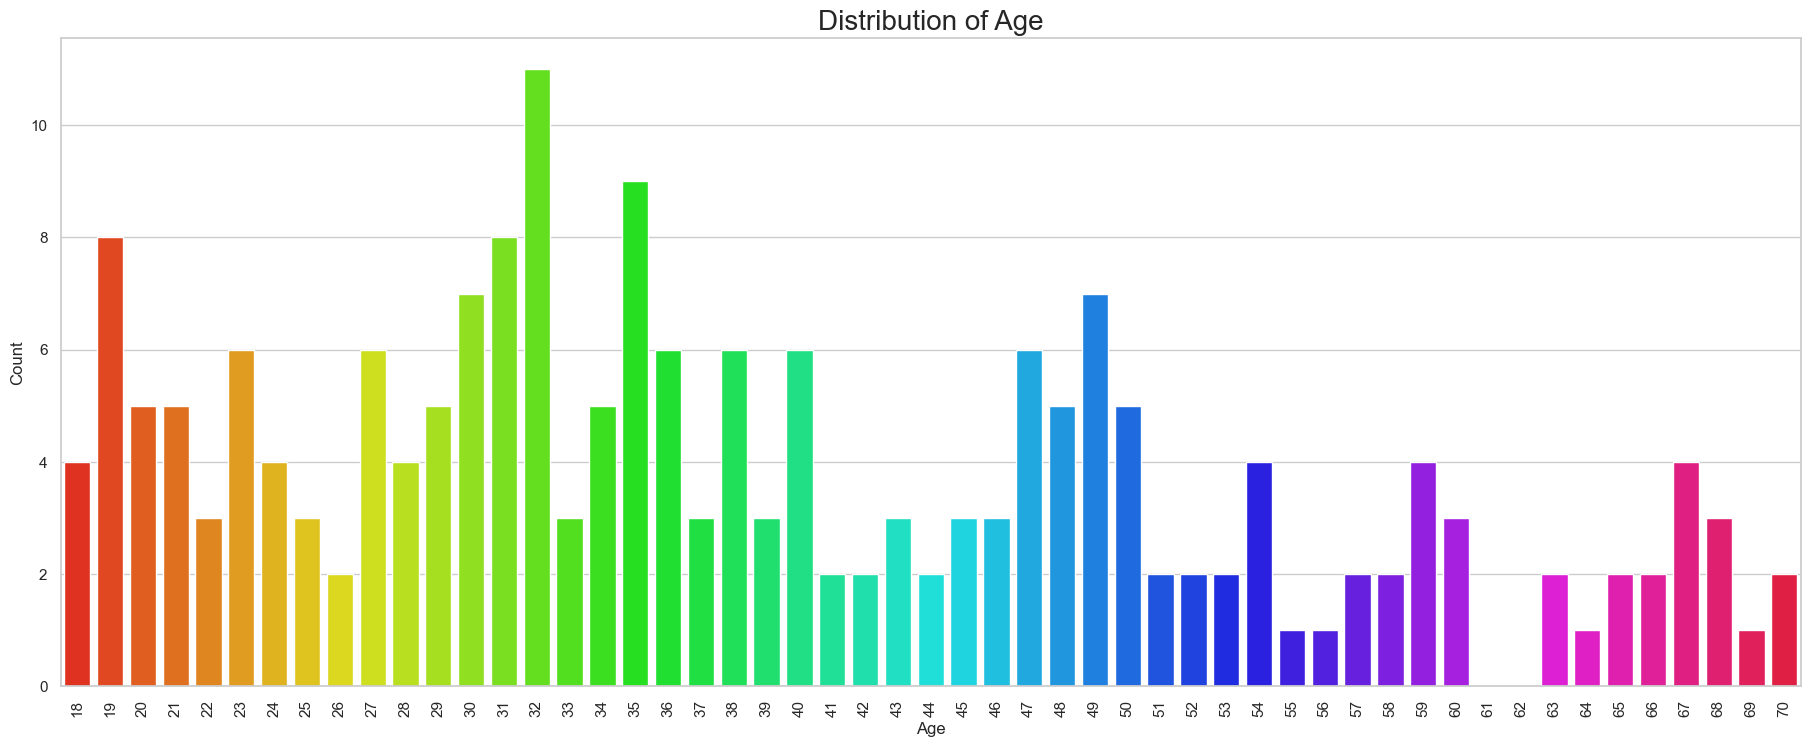

In [131]:
#Distribution of Age

# Set the figure size for better readability
plt.figure(figsize=(20, 8))

# Filter your existing data to include ages between 18 and 70
filtered_data = data[(data['Age'] >= 18) & (data['Age'] <= 70)]

# Create the count plot
# The 'order' parameter ensures that all ages from 18 to 70 are displayed on the x-axis
sns.countplot(x='Age', data=filtered_data, palette='hsv', order=range(18, 71))

# Set the title and labels for the plot
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=90)

# Save the plot to a file
plt.savefig('age_distribution.png')

# Display the plot
plt.show()


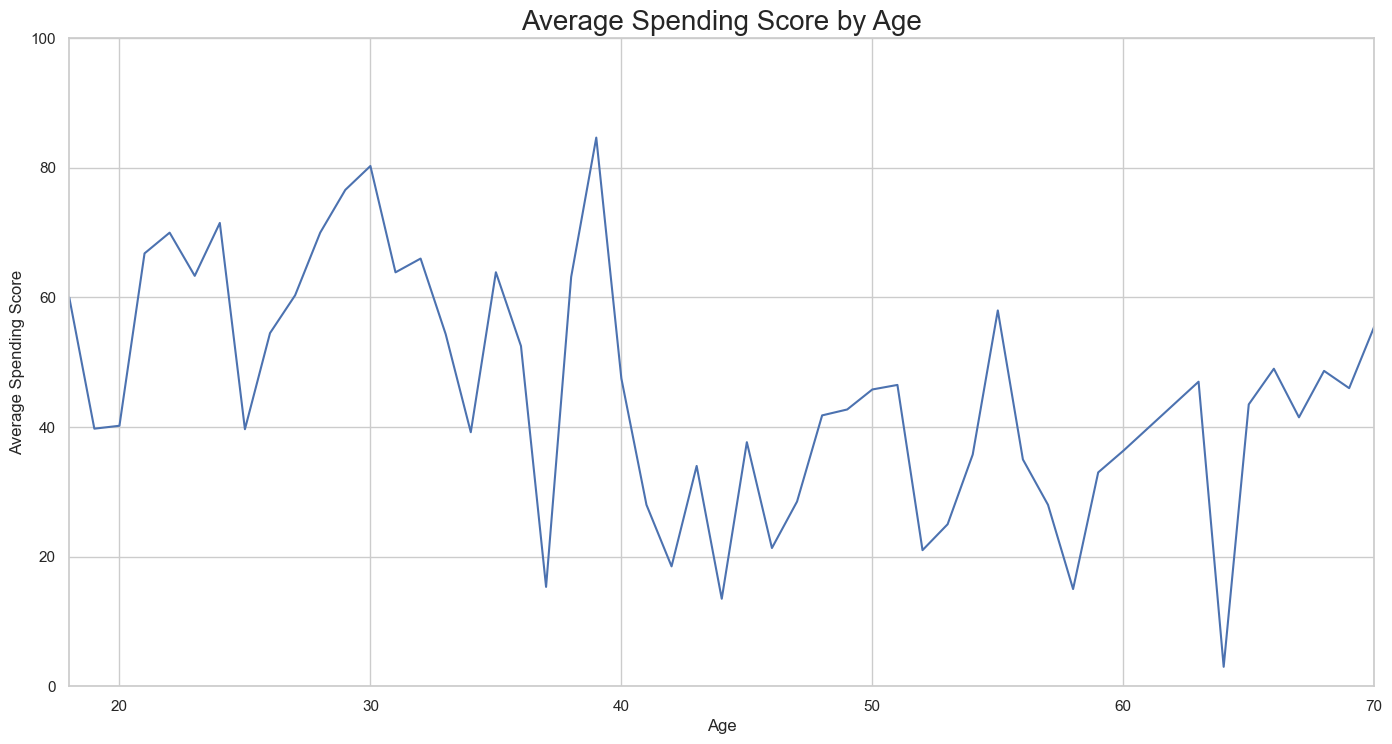

In [132]:
#Average Spending Score vs Age

# Set the default size for the plot
plt.rcParams['figure.figsize'] = (15, 8)

# Group the data by 'Age' and calculate the mean 'Spending Score' for each age
avg_spending = data.groupby('Age')['Spending Score (1-100)'].mean().reset_index()

# Create a line plot of Age vs. Average Spending Score
plt.plot(avg_spending['Age'], avg_spending['Spending Score (1-100)'])

# Set the limits for the x and y axes
plt.xlim(18, 70)
plt.ylim(0, 100)

# Set the title and labels for the plot
plt.title('Average Spending Score by Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Average Spending Score')

# Display the final plot
plt.show()

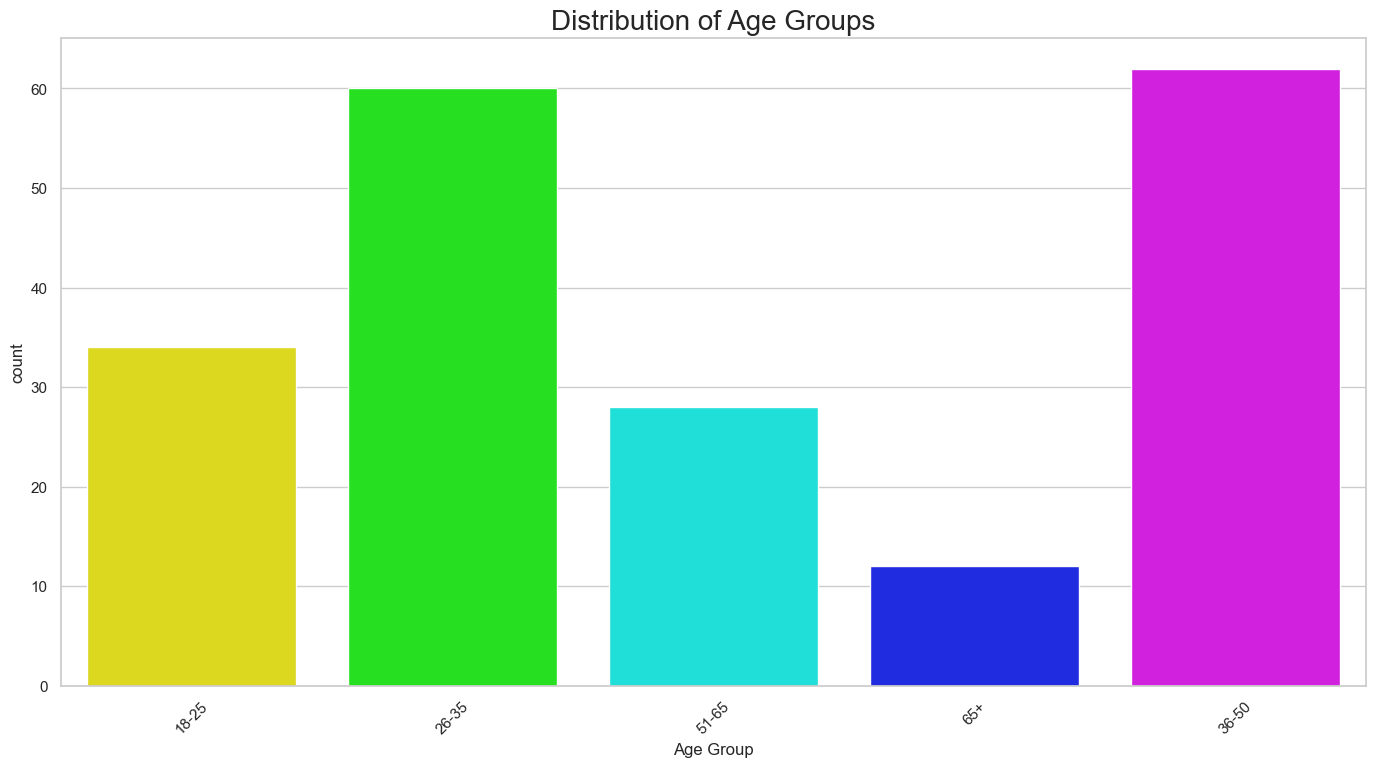

In [133]:
#Distribution of Agr Group vs Age Group

# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Create the count plot for the 'Age Group' column from your dataframe
sns.countplot(x='Age Group', data=data, palette='hsv')

# Set the title for the plot
plt.title('Distribution of Age Groups', fontsize=20)

# Rotate the x-axis labels to make them easier to read
plt.xticks(rotation=45)

# Save the generated plot as an image file
plt.savefig('age_group_distribution.png')

# Display the plot
plt.show()

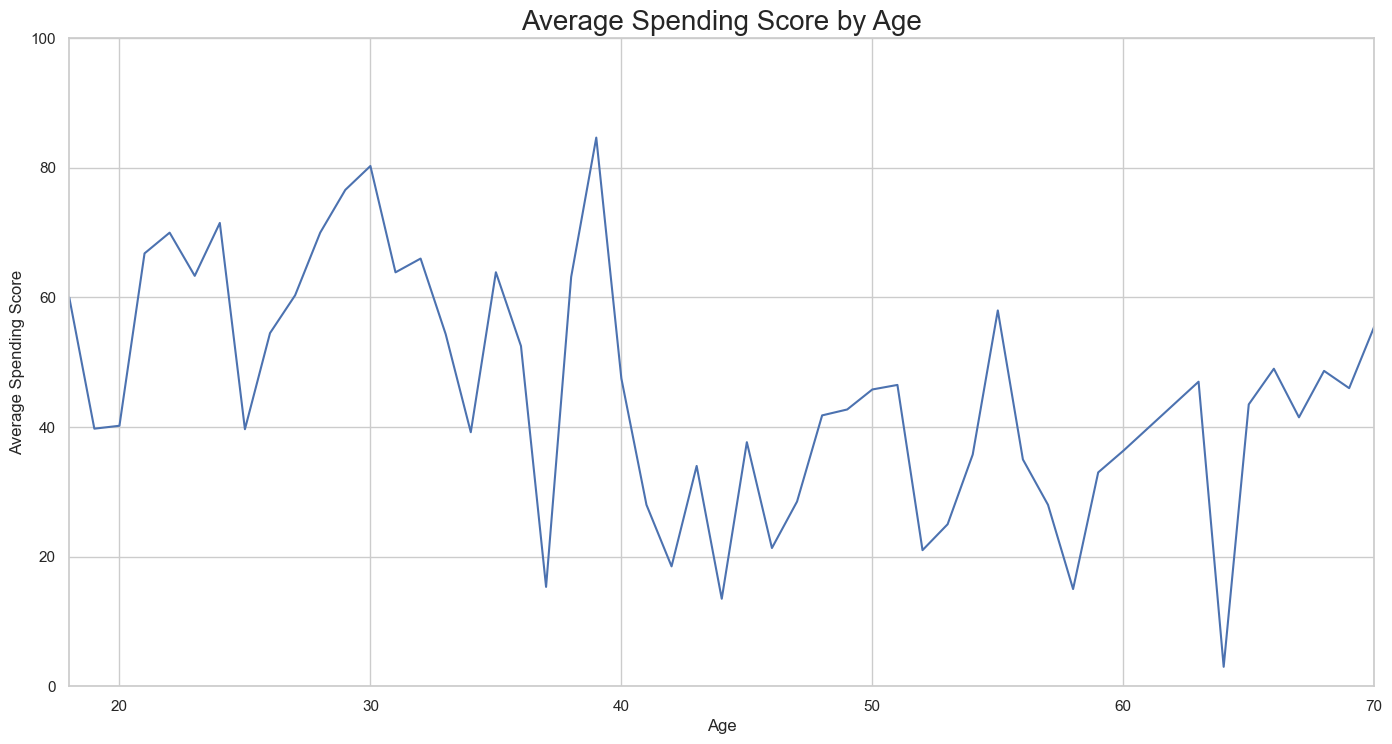

In [134]:
# Average Spending Score by Age

# Set the default size for the plot
plt.rcParams['figure.figsize'] = (15, 8)

# Group the data by 'Age' and calculate the mean 'Spending Score' for each age
avg_spending = data.groupby('Age')['Spending Score (1-100)'].mean().reset_index()

# Create a line plot of Age vs. Average Spending Score
plt.plot(avg_spending['Age'], avg_spending['Spending Score (1-100)'])

# Set the limits for the x and y axes
plt.xlim(18, 70)
plt.ylim(0, 100)

# Set the title and labels for the plot
plt.title('Average Spending Score by Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Average Spending Score')

# Display the final plot
plt.show()

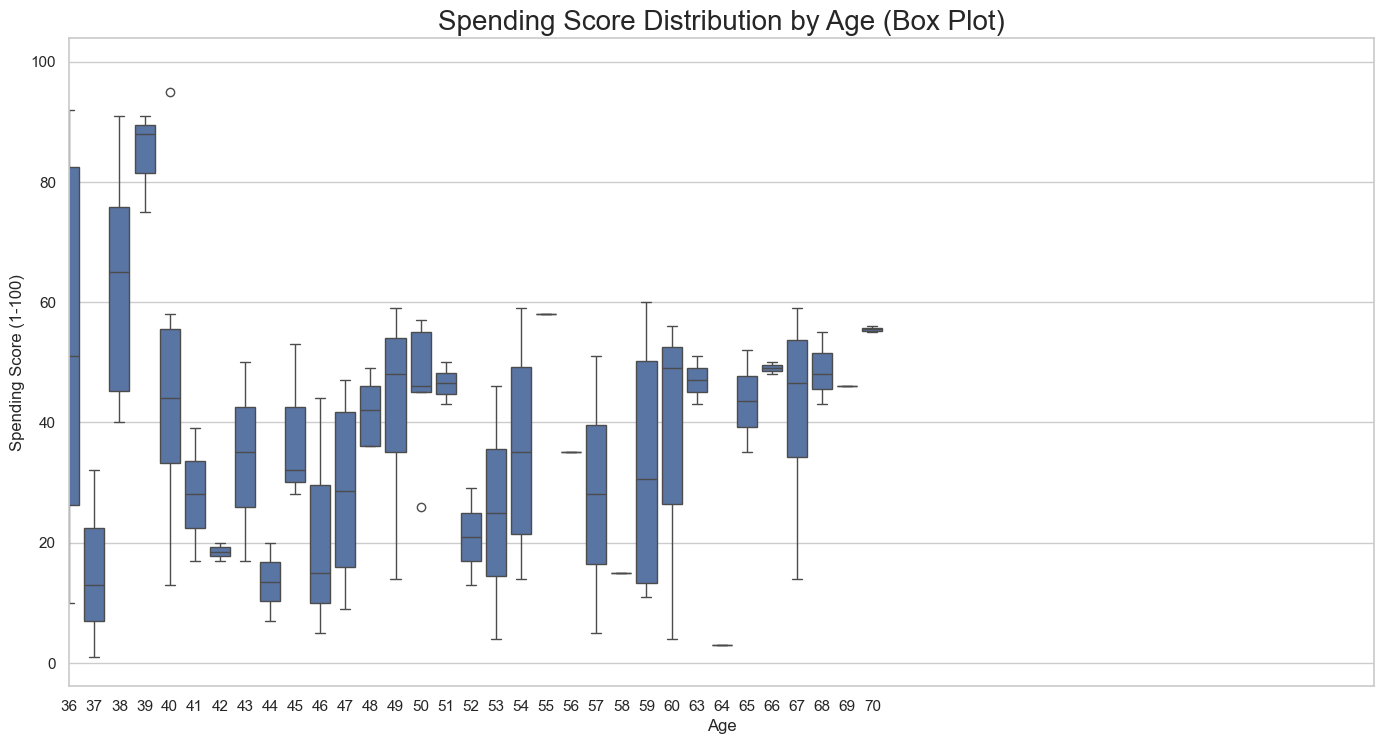

In [135]:
# Spending Score Distrobution by Age (Box Plot)

# Set the size of the plot
plt.rcParams['figure.figsize'] = (15, 8)

# Create a box plot to show the distribution of Spending Score for each Age
sns.boxplot(x='Age', y='Spending Score (1-100)', data=data)

# Set the limits for the x-axis (Age)
plt.xlim(18, 70)

# Set the title of the plot
plt.title('Spending Score Distribution by Age (Box Plot)', fontsize=20)

# Display the final plot
plt.show()

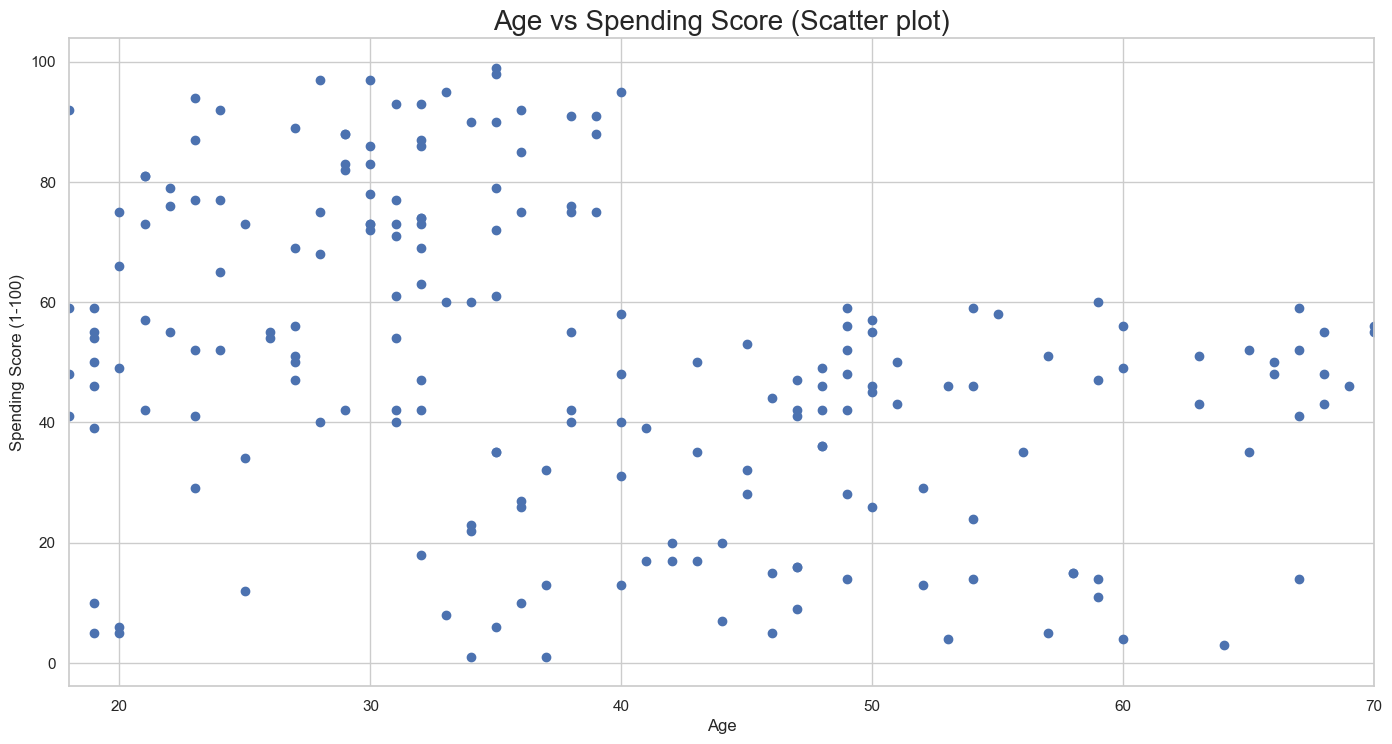

In [136]:
# Age vs Spending Score (Scatter Plot)

# Set the size of the plot
plt.rcParams['figure.figsize'] = (15, 8)

# Create a scatter plot of Age vs. Spending Score
plt.scatter(data['Age'], data['Spending Score (1-100)'])

# Set the limits for the x-axis
plt.xlim(18, 70)

# Set the title and labels for the plot
plt.title('Age vs Spending Score (Scatter plot)', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Display the final plot
plt.show()

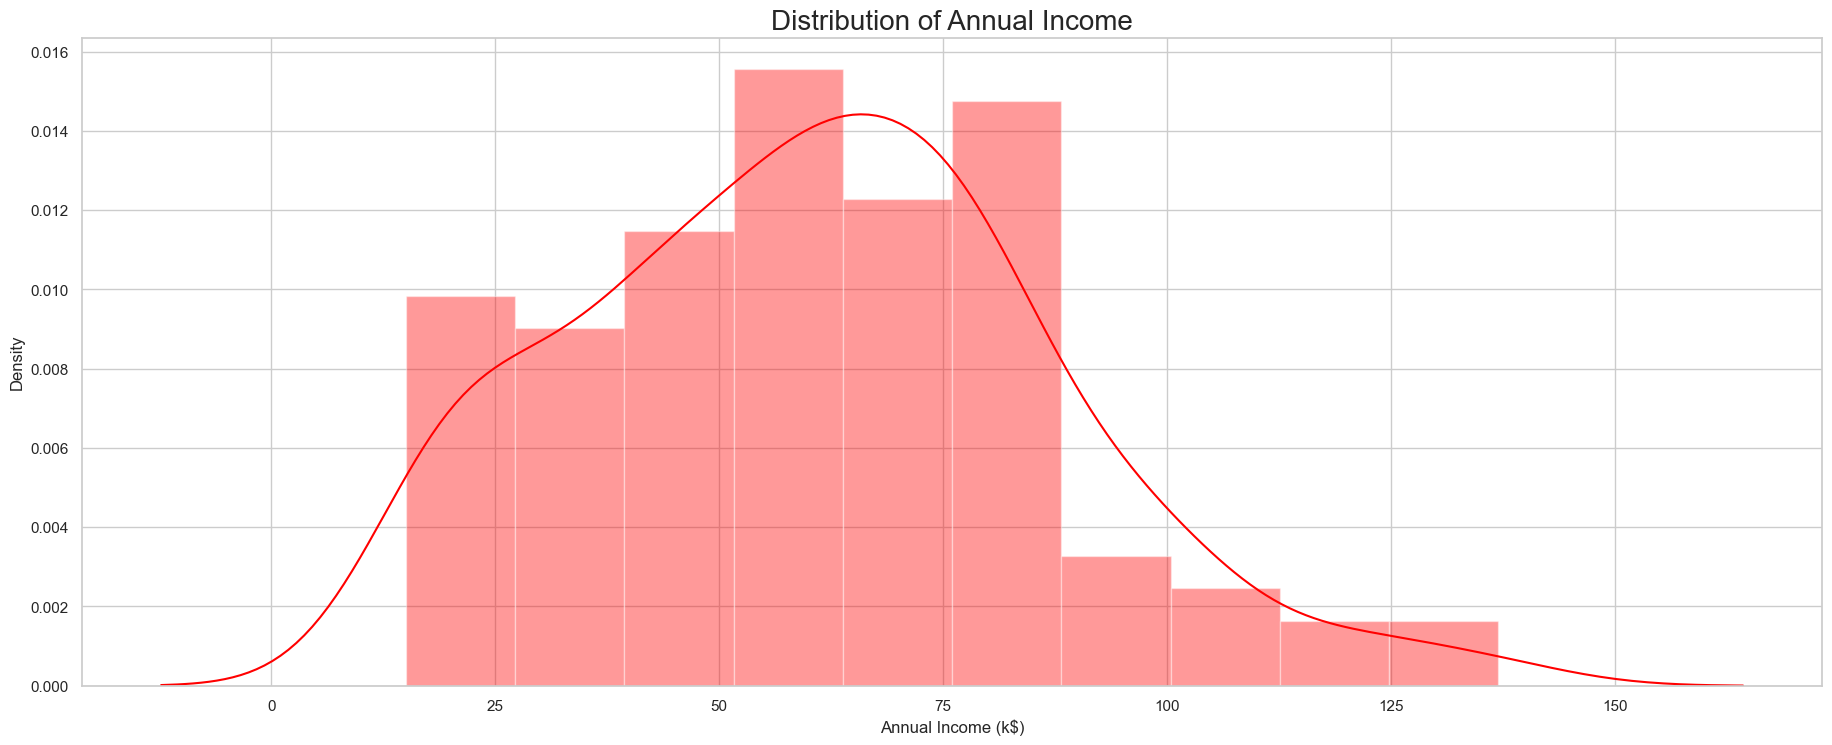

In [137]:
#Lets check distribution of annual income

# Set the size of the plot
plt.rcParams['figure.figsize'] = (20, 8)

# Create a distribution plot for the 'Annual Income' column in red
sns.distplot(data['Annual Income (k$)'], color = 'red')

# Set the title of the plot
plt.title("Distribution of Annual Income", fontsize = 20)

# Display the final plot
plt.show()

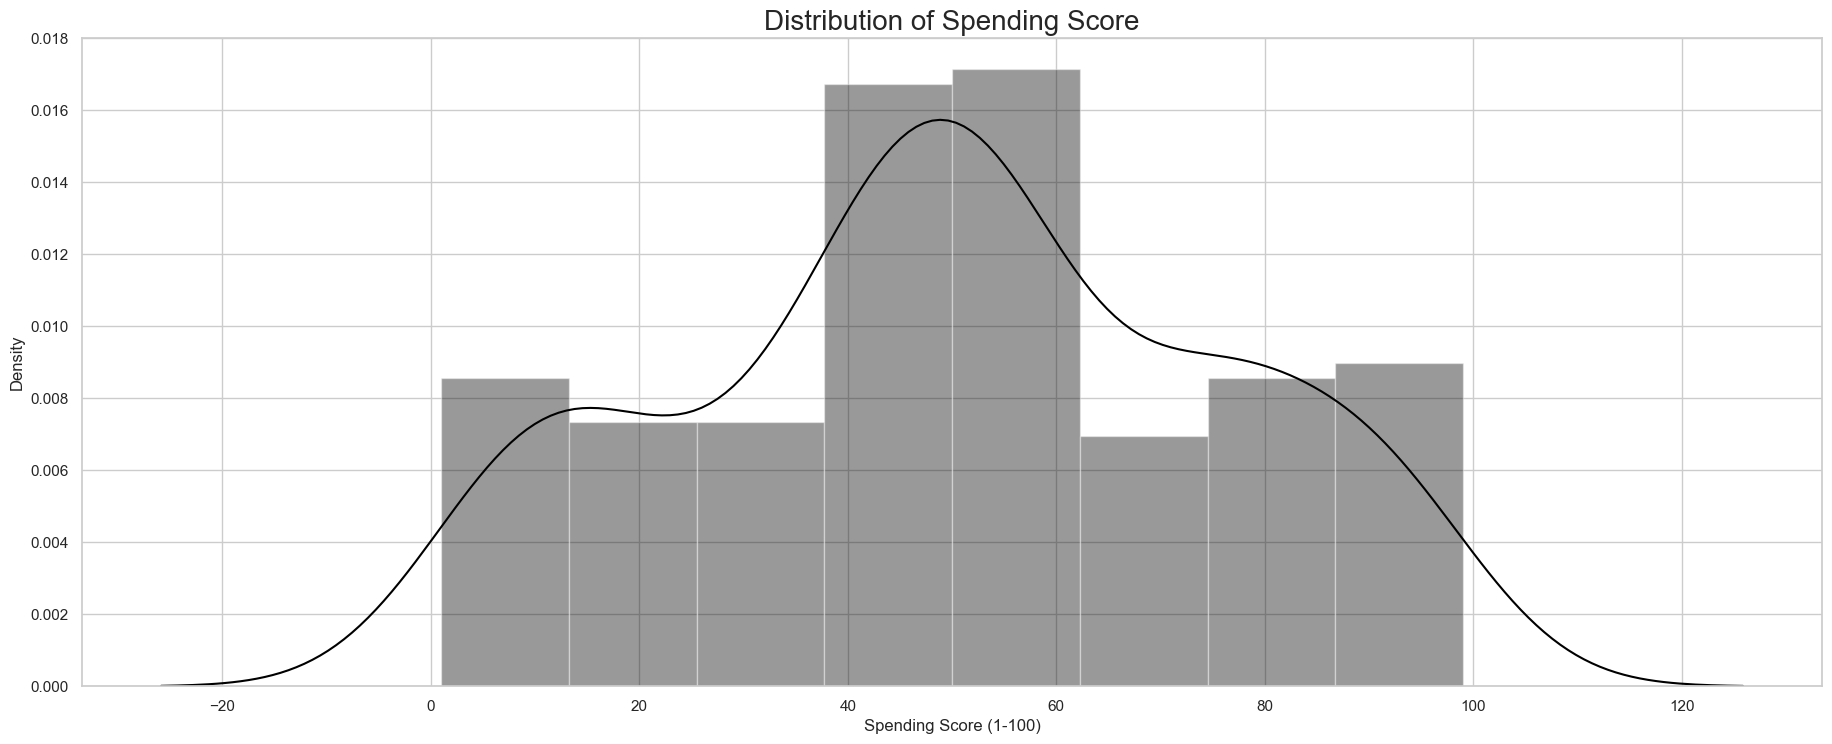

In [138]:
#Lets Check the Distribution of Spending Score

# Set the size of the plot
plt.rcParams['figure.figsize'] = (20, 8)

# Create a distribution plot for the 'Spending Score' column in black
sns.distplot(data['Spending Score (1-100)'], color = 'black')

# Set the title of the plot
plt.title("Distribution of Spending Score", fontsize = 20)

# Display the final plot
plt.show()

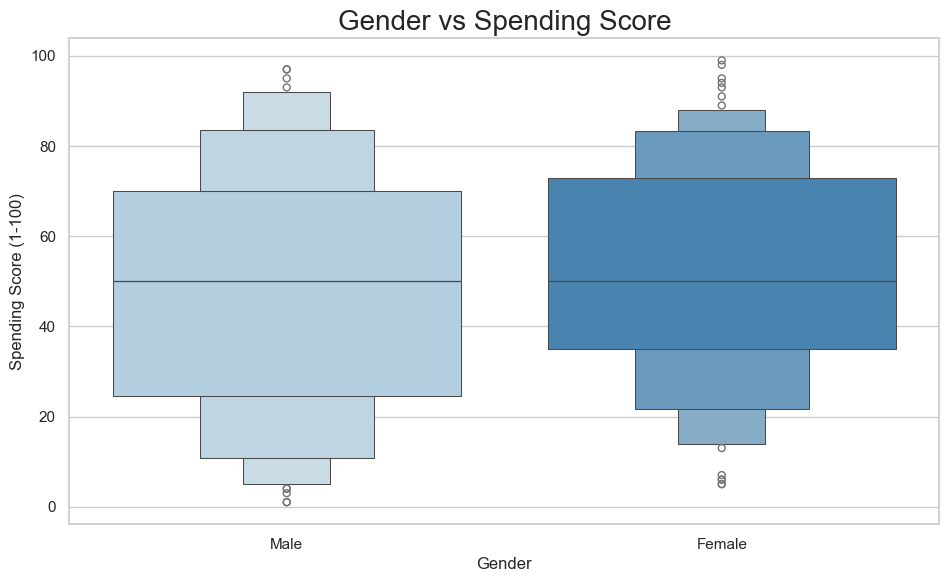

In [139]:
#Gender vs Spending Score

# Set the figure size
plt.rcParams['figure.figsize'] = (10, 6)

# Create the boxenplot
sns.boxenplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Blues')

# Set the title of the plot
plt.title('Gender vs Spending Score', fontsize=20)

# Display the plot
plt.show()

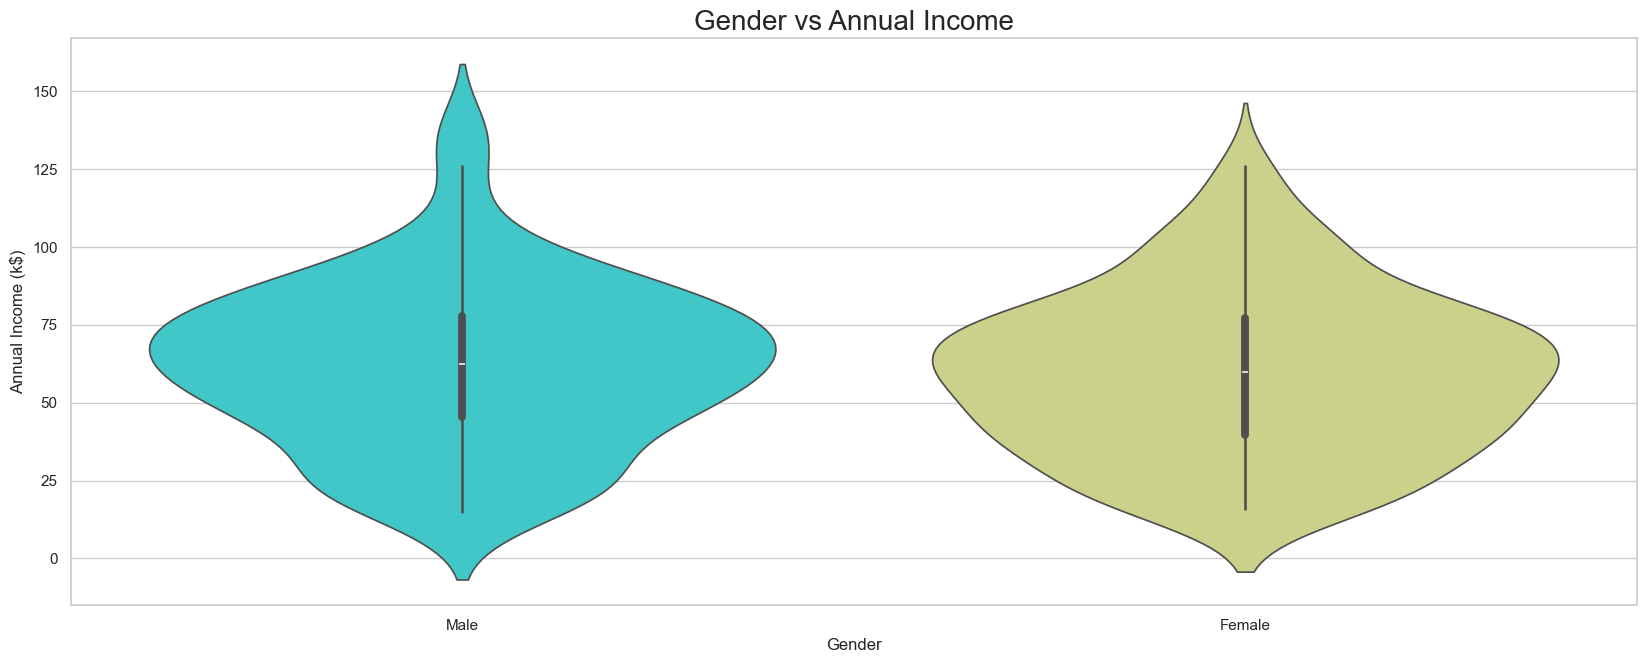

In [140]:
# Gender Vs Anual Income
# Set the figure size
plt.rcParams['figure.figsize'] = (18, 7)

# USE violinplot() for rainbow shape
sns.violinplot(x='Gender', y='Annual Income (k$)', data=data, palette='rainbow')

# Set the title of the plot
plt.title('Gender vs Annual Income', fontsize=20)

# Display the plot
plt.show()

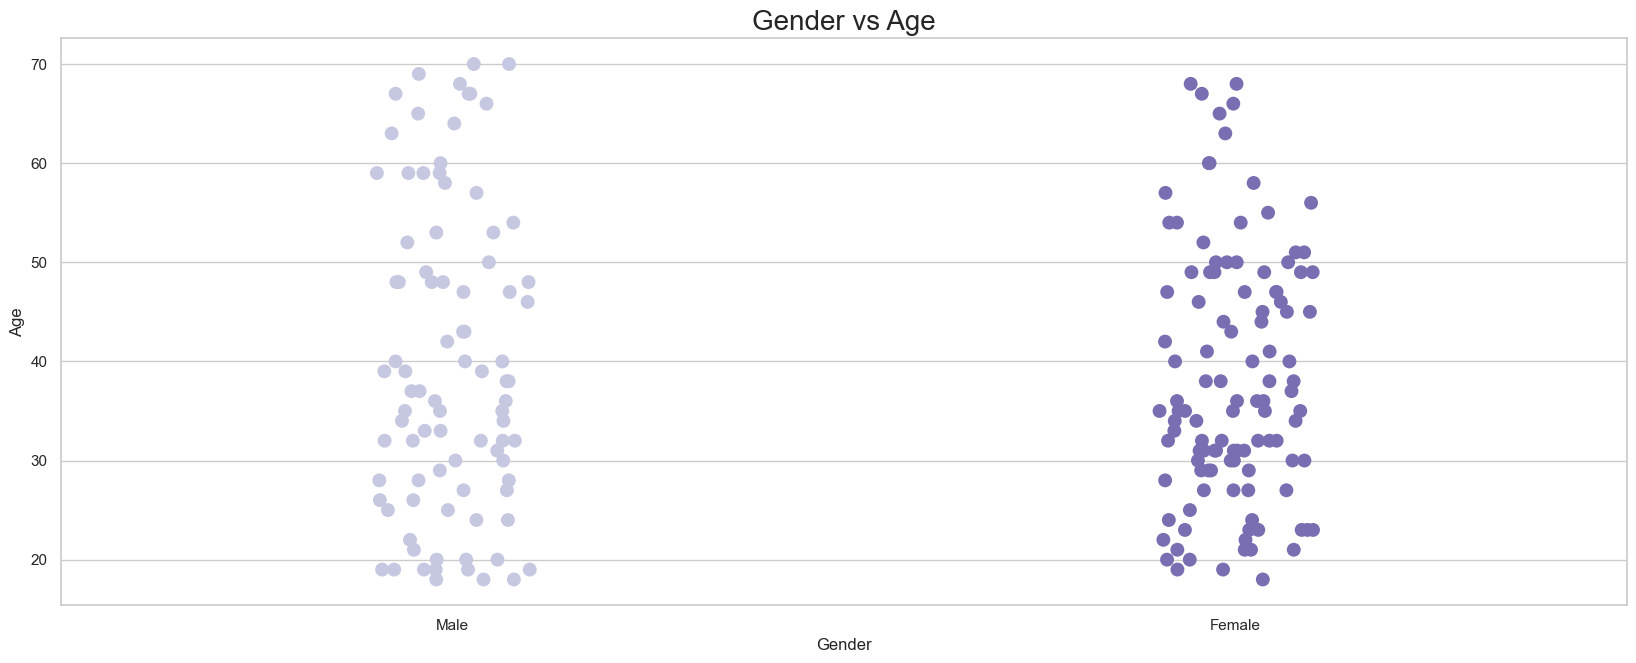

In [141]:
# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (18, 7)

# Create the stripplot using keyword arguments for x, y, and data
sns.stripplot(x='Gender', y='Age', data=data, palette='Purples', size=10)

# Set the title of the plot
plt.title('Gender vs Age', fontsize=20)

# Display the plot
plt.show()

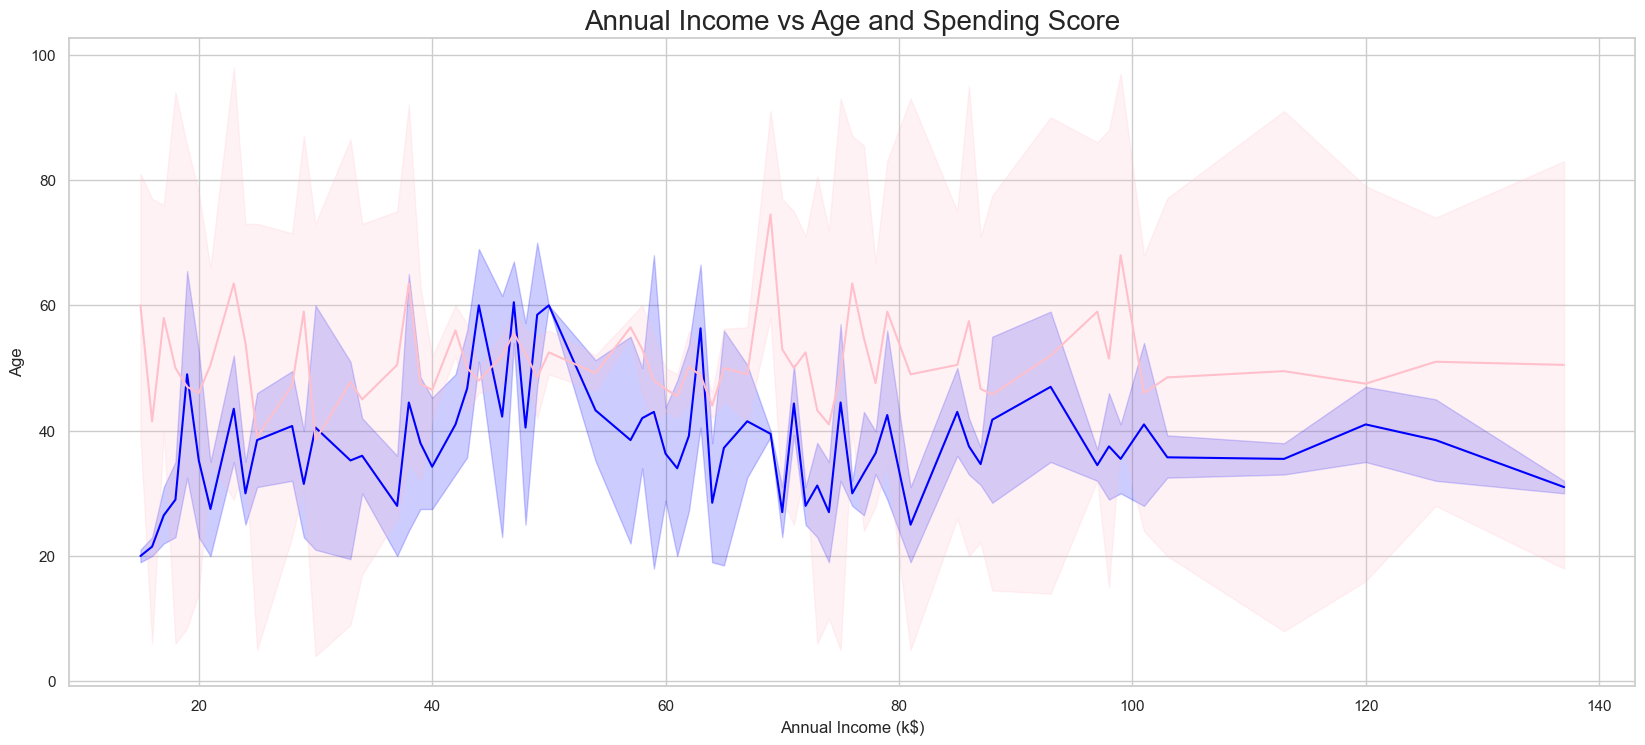

In [142]:
# Annual Income vs Age and Spending Score

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 8) # I've added this line back for completeness

# Create the first line plot using the modern syntax
sns.lineplot(data=data, x='Annual Income (k$)', y='Age', color='blue')

# Create the second line plot on the same axes
sns.lineplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', color='pink')

# Set the title of the plot
plt.title('Annual Income vs Age and Spending Score', fontsize=20)

# Display the plot
plt.show()